# 3.1 - Regresion Lineal (ing. carac.)

**Ecuacion de la recta**

$$y = m·x+b$$

In [1]:
import pandas as pd
import numpy as np
import pylab as plt

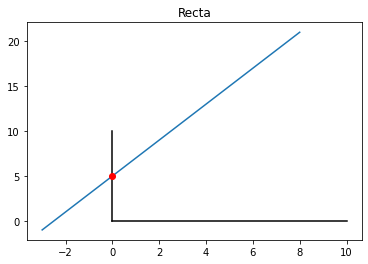

In [3]:
x=[i for i in range(-3, 9)]

m=2
b=5

y=[m*x + b for x in x]  # y=2x+5

plt.plot(x, y)
plt.plot([0, 0], [0, 10], color='black')
plt.plot([0, 10], [0, 0], color='black')
plt.plot(0, b, 'ro')
plt.title('Recta');

**Generalizacion de la ecuacion de la recta**

$$y=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3+\ldots+\beta_nx_n$$

El objetivo de la regresion lineal es obtener los $\beta$:
+ Algebraicamente: $\beta = (X^{T}X)^{-1}X^{T}Y$
+ Minimos cuadrados

In [4]:
from scipy.stats import linregress

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [5]:
auto=pd.read_csv('../data/auto-mpg.csv')

auto.head()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


In [9]:
# y=mx+b , mpg=m*aceleracion + b

x=auto.acceleration
y=auto.mpg

linreg=linregress(x, y)
linreg  # pendiente, ordenada en el origen, coeficiente de determinacion, p-valor, error std, ordenada en el origen para el error)

LinregressResult(slope=1.1912045293502271, intercept=4.969793004253912, rvalue=0.42028891210165065, pvalue=1.8230915350787338e-18, stderr=0.129236432831014, intercept_stderr=2.0432078977616825)

In [12]:
R2=linreg[2]**2

R2

0.17664276963558903

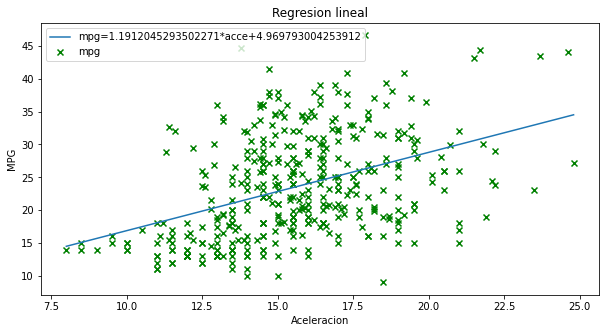

In [13]:
# plot

x=np.linspace(auto.acceleration.min(), auto.acceleration.max(), 50)
y=linreg[0]*x+linreg[1]

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='mpg={}*acce+{}'.format(linreg[0], linreg[1]))
plt.scatter(auto.acceleration, auto.mpg, marker='x', c='g', label='mpg')

plt.title('Regresion lineal')
plt.xlabel('Aceleracion')
plt.ylabel('MPG')
plt.legend()
plt.show();

In [15]:
# linreg con statsmodels
import warnings
warnings.simplefilter('ignore')


x=sm.add_constant(auto.acceleration)

y=auto.mpg

modelo=sm.OLS(y, x).fit()

In [17]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     84.96
Date:                Tue, 25 Jan 2022   Prob (F-statistic):           1.82e-18
Time:                        20:17:08   Log-Likelihood:                -1343.9
No. Observations:                 398   AIC:                             2692.
Df Residuals:                     396   BIC:                             2700.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.9698      2.043      2.432      0.015       0.953       8.987
acceleration     1.1912      0.129      9.217      0.000       0.937       1.445
==============================================================================
Omnibus:                       17.459   Durbin-Watson:                   0.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.214
Skew:                           0.497   Prob(JB):                     0.000111
Kurtosis:                       2.670   Cond. No.                         91.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
pred=modelo.predict(x)
pred

0      19.264247
1      18.668645
2      18.073043
3      19.264247
4      17.477441
         ...    
393    23.552584
394    34.273424
395    18.787766
396    27.126197
397    28.079161
Length: 398, dtype: float64

In [33]:
# varias variables

x=sm.add_constant(auto[[
    #'acceleration',
    #'cylinders',
    'weight',
    #'horse_power',
    'model_year',
    #'displacement'
]].apply(lambda x: x.fillna(x.mean()))

)

y=auto.mpg

modelo=sm.OLS(y, x).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     830.4
Date:                Tue, 25 Jan 2022   Prob (F-statistic):          3.26e-142
Time:                        20:42:33   Log-Likelihood:                -1054.3
No. Observations:                 398   AIC:                             2115.
Df Residuals:                     395   BIC:                             2127.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.1980      3.968     -3.578      0.000     -21.998      -6.398
weight        -0.0067      0.000    -31.161      0.000      -0.007      -0.006
model_year     0.7566      0.049     15.447      0.000       0.660       0.853
==============================================================================
Omnibus:                       41.827   Durbin-Watson:                   1.216
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.734
Skew:                           0.665   Prob(JB):                     1.19e-15
Kurtosis:                       4.541   Cond. No.                     7.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
modelo.params

const        -14.197982
weight        -0.006664
model_year     0.756572
dtype: float64

In [34]:
# version sklearn

!pip install scikit-learn

In [35]:
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import r2_score as r2

In [36]:
auto=auto.dropna()


x=auto[[
    #'acceleration',
    #'cylinders',
    'weight',
    #'horse_power',
    'model_year',
    #'displacement'
    ]]

y=auto.mpg

In [37]:
modelo=LinReg(fit_intercept=True).fit(x, y)
modelo

LinearRegression()

In [38]:
modelo.coef_

array([-0.00663208,  0.75731828])

In [39]:
modelo.intercept_

-14.347253017615838

In [40]:
pred=modelo.predict(x)
pred[:10]

array([15.42623483, 14.1727726 , 15.87721595, 15.89711217, 15.79099897,
        9.87518781,  9.78897083, 10.06751799,  9.31809348, 13.13153678])

In [41]:
r2(y, pred)

0.8081803058793997

In [46]:
x_new=np.array([3211, 89])

In [49]:
modelo.predict(x_new.reshape(1, -1))

array([31.75848023])

In [50]:
-0.00663208*3211 + 0.75731828*89 - 14.347253017615838

31.75846502238416